In [13]:
import spotpy
import os
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import import_ipynb

In [14]:
data=pd.read_excel("Dataset.xlsx")
data2=pd.read_excel("Dataset_R.xlsx")

In [15]:
# EXTRAER DATOS DEL DATASET
matriz_datos=data.values
Tiempo=[]
BPM=[]
for i in range(len(matriz_datos)):
    Tiempo.append(matriz_datos[i][0])
    BPM.append(matriz_datos[i][1])
matriz_datos2=data2.values
Tiempo2=[]
BPM2=[]
for i in range(len(matriz_datos2)):
    Tiempo2.append(matriz_datos2[i][0])
    BPM2.append(matriz_datos2[i][1])

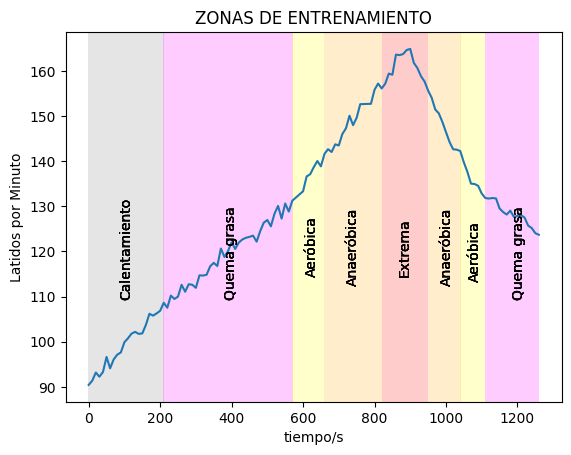

In [20]:
pp = PdfPages("DataOutVis.pdf")
max_bpm=max(data['BPM'])

data.loc[(data['BPM'] <= 0.65*max_bpm),'zonas']=1
data.loc[(data['BPM'] <= 0.80*max_bpm) & (0.65*max_bpm < data['BPM']),'zonas']=2
data.loc[(data['BPM'] <= 0.85*max_bpm) & (0.80*max_bpm < data['BPM']),'zonas']=3
data.loc[(data['BPM'] <= 0.95*max_bpm) & (0.85*max_bpm < data['BPM']),'zonas']=4
data.loc[(0.95*max_bpm <= data['BPM']),'zonas']=5

def ObtenerZonasBPM(data,zon):
    tiempos=[]
    zonass=[]
    fin=[]
    inicio=False

    for i in range(len(data['zonas'])):
        if(data['zonas'][i]==zon):
            zonass.append(data['Tiempo(s)'][i])


    zonass.append(1000)
    for j in range(len(zonass)):
        if(j+1!=len(zonass)):
            if(zonass[j]==zonass[j+1]-20 or zonass[j]==zonass[j+1]-10):
                if(inicio==False and len(zonass)-1!=j):
                    tiempos.append(zonass[j])
                    inicio=True
                elif(inicio==True and len(zonass)-2==j):
                    tiempos.append(zonass[j])
                    fin.append(tiempos)
                    tiempos=[]

            else:
                tiempos.append(zonass[j])
                fin.append(tiempos)
                inicio=False
                tiempos=[]
    return fin

GraficoZonasBPM=plt.figure()
a=plt.plot(data['Tiempo(s)'], data['BPM'])

for i in range(1,6):
    if(i==1):
        matriz=ObtenerZonasBPM(data,i)
        if(len(matriz)==1):
            plt.axvspan(matriz[0][0]-1, matriz[0][1]+10, facecolor='gray', edgecolor='none', alpha=.2)

        else:
            for j in range(len(matriz)):
                plt.axvspan(matriz[j][0]-1, matriz[j][1]+1, facecolor='gray', edgecolor='none', alpha=.2)
    elif(i==2):
        matriz=ObtenerZonasBPM(data,i)
        if(len(matriz)==1):
            plt.axvspan(matriz[0][0]-1, matriz[0][1]+1, facecolor='magenta', edgecolor='none', alpha=.2)

        else:
            for j in range(len(matriz)):
                plt.axvspan(matriz[j][0]-1, matriz[j][1]+1, facecolor='magenta', edgecolor='none', alpha=.2)

    elif(i==3):
        matriz=ObtenerZonasBPM(data,i)
        if(len(matriz)==1):
            plt.axvspan(matriz[0][0]-1, matriz[0][1]+1, facecolor='yellow', edgecolor='none', alpha=.2)

        else:
            for j in range(len(matriz)):
                plt.axvspan(matriz[j][0]-10, matriz[j][1]+10, facecolor='yellow', edgecolor='none', alpha=.2)
    elif(i==4):
        matriz=ObtenerZonasBPM(data,i)
        if(len(matriz)==1):
            plt.axvspan(matriz[0][0]-1, matriz[0][1]+1, facecolor='orange', edgecolor='none', alpha=.2)

        else:
            for j in range(len(matriz)):
                plt.axvspan(matriz[j][0]-1, matriz[j][1]+1, facecolor='orange', edgecolor='none', alpha=.2)

    elif(i==5):
        matriz=ObtenerZonasBPM(data,i)
        if(len(matriz)==1):
            plt.axvspan(matriz[0][0]+10, matriz[0][1]+10, facecolor='red', edgecolor='none', alpha=.2)

        else:
            for j in range(len(matriz)):
                plt.axvspan(matriz[j][0]-1, matriz[j][1]+1, facecolor='red', edgecolor='none', alpha=.2)

    plt.ylabel('Latidos por Minuto')
    plt.xlabel('tiempo/s')
    plt.title('ZONAS DE ENTRENAMIENTO')
    plt.annotate(text='Calentamiento', xy=(85, 110), rotation = 'vertical', color = 'black')
    plt.annotate(text='Quema grasa', xy=(380, 110), rotation = 'vertical', color = 'black')
    plt.annotate(text='Aeróbica', xy=(605, 115), rotation = 'vertical', color = 'black')
    plt.annotate(text='Anaeróbica', xy=(720, 113), rotation = 'vertical', color = 'black')
    plt.annotate(text='Extrema', xy=(865, 115), rotation = 'vertical', color = 'black')
    plt.annotate(text='Anaeróbica', xy=(983, 113), rotation = 'vertical', color = 'black')
    plt.annotate(text='Aeróbica', xy=(1060, 114), rotation = 'vertical', color = 'black')
    plt.annotate(text='Quema grasa', xy=(1185, 110), rotation = 'vertical', color = 'black')

pp.savefig(GraficoZonasBPM)

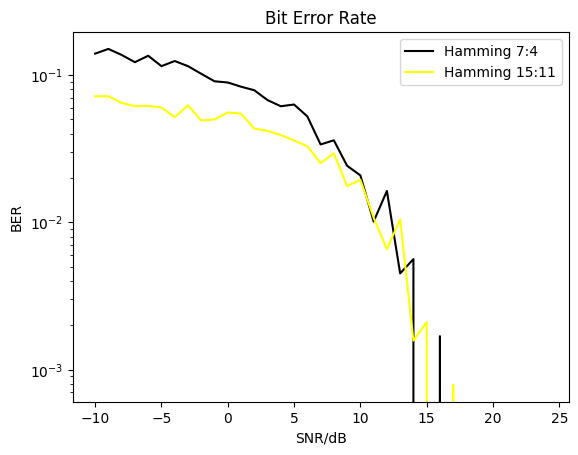

In [21]:
# IMPORTAR DATOS DEL DECODIFICADOR
snr_senal_demodulada = pd.read_excel('SNR74.xlsx',usecols="A")
ber_hamming_74 = pd.read_excel('SNR74.xlsx',usecols="B")
ber_hamming_1511 = pd.read_excel('SNR1511.xlsx',usecols="B")
lista_snr_senal_modulada=np.array(snr_senal_demodulada).T[0]
lista_ber_hamming_74=np.array(ber_hamming_74).T[0]
lista_ber_hamming_1511=np.array(ber_hamming_1511).T[0]

# VISUALIZACION DE LOS BER's
GraficoBER=plt.figure()
plt.ylabel('BER')
plt.xlabel('SNR/dB')
plt.title('Bit Error Rate')
plt.semilogy(lista_snr_senal_modulada, lista_ber_hamming_74, label="Hamming 7:4", color='black')
plt.semilogy(lista_snr_senal_modulada,lista_ber_hamming_1511,label="Hamming 15:11", color='yellow')
plt.legend()
pp.savefig(GraficoBER)


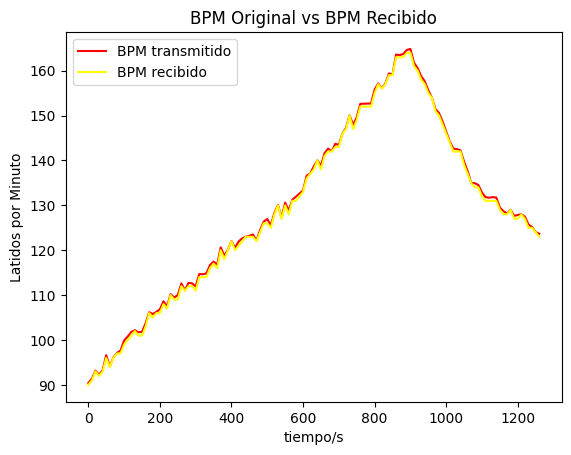

In [22]:
GraficoDatosOriginales = plt.figure()
plt.ylabel('Latidos por Minuto')
plt.xlabel('tiempo/s')
plt.title('BPM Original vs BPM Recibido')
plt.plot(Tiempo, BPM, label="BPM transmitido", color='red')
plt.plot(Tiempo2, BPM2, label="BPM recibido", color='yellow')
plt.legend()


pp.savefig(GraficoDatosOriginales)

In [ ]:
pp.close()